<a href="https://colab.research.google.com/github/TechyMT/ClassWork/blob/main/DSBDA/Assgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSBDL Assignment 02 - Data Wrangling 2
Create an “Academic performance” dataset of students and perform the following operations using Python. transformation should be one of the following reasons: to change the scale for better


Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

Apply data transformations on at least one of the variables. The purpose of this
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

Dataset details: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [81]:
df = pd.read_csv("/content/academic_performance.csv")

In [82]:
df.describe()

,WT Score,DSBDA Score,AI Score
count,999.000000,998.000000,1000.000000
mean,66.093093,69.178357,68.054000
std,15.170122,14.611940,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1000 non-null   object 
 1   Groups                   1000 non-null   object 
 2   Education Level          997 non-null    object 
 3   Fee Structure            1000 non-null   object 
 4   Test Preparation Course  358 non-null    object 
 5   WT Score                 999 non-null    float64
 6   DSBDA Score              998 non-null    float64
 7   AI Score                 1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [84]:
df.head()

,Gender,Groups,Education Level,Fee Structure,Test Preparation Course,WT Score,DSBDA Score,AI Score
0,Female,Group B,Bachelor's Degree,Standard,NaN,72.0,72.0,74
1,Female,Group C,Some College,Standard,Completed,69.0,90.0,88
2,Female,Group B,Master's Degree,Standard,NaN,90.0,95.0,93
3,Male,Group A,Associate's Degree,Free/Reduced,NaN,47.0,57.0,44
4,Male,Group C,Some College,Standard,NaN,76.0,78.0,75


In [85]:
df.dtypes

Gender                      object
Groups                      object
Education Level             object
Fee Structure               object
Test Preparation Course     object
WT Score                   float64
DSBDA Score                float64
AI Score                     int64
dtype: object

In [86]:
df.shape

(1000, 8)

In [87]:
df.isnull().sum()

Gender                       0
Groups                       0
Education Level              3
Fee Structure                0
Test Preparation Course    642
WT Score                     1
DSBDA Score                  2
AI Score                     0
dtype: int64

In [88]:
df.drop(["Test Preparation Course"], axis = 1, inplace = True)
df.head()

,Gender,Groups,Education Level,Fee Structure,WT Score,DSBDA Score,AI Score
0,Female,Group B,Bachelor's Degree,Standard,72.0,72.0,74
1,Female,Group C,Some College,Standard,69.0,90.0,88
2,Female,Group B,Master's Degree,Standard,90.0,95.0,93
3,Male,Group A,Associate's Degree,Free/Reduced,47.0,57.0,44
4,Male,Group C,Some College,Standard,76.0,78.0,75


In [89]:
df["DSBDA Score"].fillna(df["DSBDA Score"].mean(), inplace= True)
df.isna().sum()

Gender             0
Groups             0
Education Level    3
Fee Structure      0
WT Score           1
DSBDA Score        0
AI Score           0
dtype: int64

In [90]:
df["WT Score"].fillna(method = "ffill", inplace= True)
df["Education Level"].fillna(method = "ffill", inplace=True)
df.isna().sum()

Gender             0
Groups             0
Education Level    0
Fee Structure      0
WT Score           0
DSBDA Score        0
AI Score           0
dtype: int64

<Axes: >

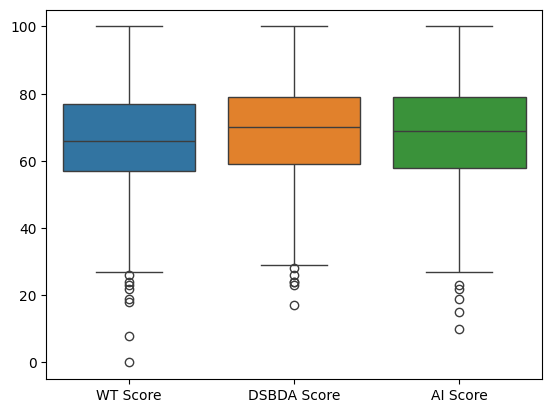

In [91]:
sns.boxplot(data = df)

<Axes: >

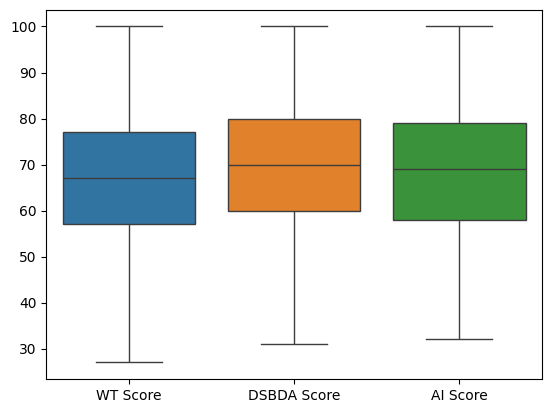

In [92]:
def remove_outliers(feature):
  global df
  q3,q1 = np.percentile(df[feature], (75,25))
  iqr = q3-q1

  df = df[(df[feature] >= q1 - 1.5 * iqr) & (df[feature] <= q3 + 1.5 * iqr)]


remove_outliers("WT Score")
remove_outliers("DSBDA Score")
remove_outliers("AI Score")
sns.boxplot(data = df)


In [93]:
label_encoder = LabelEncoder()

df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Groups"] = label_encoder.fit_transform(df["Groups"])
df["Education Level"] = label_encoder.fit_transform(df["Education Level"])
df["Fee Structure"] = label_encoder.fit_transform(df["Fee Structure"])
df.dtypes

Gender               int64
Groups               int64
Education Level      int64
Fee Structure        int64
WT Score           float64
DSBDA Score        float64
AI Score             int64
dtype: object

In [94]:
df["DSBDA Score"].skew()
df["DSBDA Score"].kurtosis()

-0.4473928645057641

In [95]:
def min_max_normalise(feature):
  df[feature] =(df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

min_max_normalise("DSBDA Score")

In [96]:
df["DSBDA Score"].kurtosis()

-0.44739286450576454